# Фреймворк PyTorch для разработки искусственных нейронных сетей

<img src='https://drive.google.com/uc?export=view&id=1v51-gWkPgQmtIhcGpmwuw81TGwMz7aM5'>

### План курса

1. Введение в PyTorch. Тензоры, автодифференцирование
2. Feed-forward нейронные сети на Pytorch
3. Dataloader, Dataset в Pytorch. Продвинутые методы оптимизации
4. Сверточные сети в Pytorch. Классификация изображений. Предобученные сети в Pytorch
5. Составная лосс-функция. Сегментация изображений.
6. Сверточные сети применительно к текстовым задачам. Эмбеддинг-слои. Классификация новостей одномерными свертками.
7. Рекурентные нейронные сети. GRU, LSTM на Pytorch. Задача NER.
8. GAN на Pytorch.
9. Bert и Transformer на Pytorch
10. Face Detection and Emotion Recognition

# PyTorch, вводное занятие

### План занятия:

* Установка
* Тензоры
* Введение в синтаксис pytorch и Тензорные вычисления
* Вычислительный граф и Автоматическое диференцирование
* Погружаемся в детали
* Tensorflow vs PyTorch
* Где полученные знания можно применить

# 0. Установка

In [1]:
!pip3 install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/08/aa/033a0a1bca4a3b8f81f97709024e053da37cf5c970f3dc5d76233c920b99/torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 5.5 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/f6/eb/5585c96636bbb2755865c31d83a19dd220ef88e716df4659dacb86e009cc/networkx-3.2-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhos

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip


# 1. Тензоры

Тензоры схожи с ndarrays в NumPy, с добавлением того, что тензоры могут быть использованы на GPU для ускорения вычислений.

### Тензоры

Тензор - основная структура данных в библиотеках машинного обучения, которая похожа на массив Numpy. Что-то вроде n-мерной матрицы или массива массивов.Тензоры обеспечивают ускорение различных математических операций. Эти операции при выполнении в большом количестве в глубоком обучении имеют огромное значение в скорости.

# 2. Введение в синтаксис pytorch и Тензорные вычисления

[База от pytorch](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [3]:
from IPython import display
import numpy as np
import random
import torch

### 2.1 Тензоры в pytorch

Тип данных, хранимых тензором, отражается в имени его конструктора. Конструктор без параметров вернёт специальное значение — тензор без размерности, который нельзя использовать ни в каких операциях.

In [4]:
torch.FloatTensor()
a = torch.Tensor()

Типы тензоров в pytorch:

torch.HalfTensor      # 16 бит, с плавающей точкой  
torch.FloatTensor     # 32 бита,  с плавающей точкой  
torch.DoubleTensor    # 64 бита, с плавающей точкой  

torch.ShortTensor     # 16 бит, целочисленный, знаковый  
torch.IntTensor       # 32 бита, целочисленный, знаковый  
torch.LongTensor      # 64 бита, целочисленный, знаковый  

torch.CharTensor      # 8 бит, целочисленный, знаковый  
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый  

torch.Tensor является сокращённым названием для torch.FloatTensor. Так же в последних версиях существует автоматическое приведение типов, если типы не сопоставимы:

In [5]:
a = torch.FloatTensor([1.0])
b = torch.DoubleTensor([2.0])
print(a)
print(b)
a * b

tensor([1.])
tensor([2.], dtype=torch.float64)


tensor([2.], dtype=torch.float64)

Но где-то могут возникать проблемы в виду разных типов. Для этого предусмотрена возможность явного приведения типов:

In [6]:
a = torch.IntTensor([1])
print(a.type())
a = a.byte()
print(a.type())

torch.IntTensor
torch.ByteTensor


In [7]:
a.float()

tensor([1.])

In [8]:
a

tensor([1], dtype=torch.uint8)

### 2.2 Немного о различиях в функциях

Соглашение о именовании в PyTorch гласит, что любая функция вида xxx возвращает новый тензор, т.е. является immutable функцией. В противоположность ей функция вида xxx_ изменяет изначальный тензор, т.е. является mutable функцией. Последние ещё носят название inplace функций. 
Почти для любой immutable функции в PyTorch существует её собрат. Однако бывает и так, что функция существует лишь в каком-то одном варианте. По понятным причинам, функции, изменяющие размер тензора всегда являются immutable.

По поводу всех функций прошу [сюда](https://pytorch.org/docs/master/tensors.html). А сейчас мы коснемся лишь самых важных.

### 2.3 Инициализация

Начнем с того, как мы можем задать наш тензор. Полный список функций можно посмотреть в [официальном источнике](https://pytorch.org/docs/stable/torch.html) под заголовком Creation Ops. Вот некоторые разные варианты:

In [9]:
a = [1. , 1.4 , 2.5]
a_tensor = torch.tensor(a)
print(f"type of tensor : ", a_tensor.type())
print(f"Simple way: {torch.tensor(a)}")
print(f"Via type : {torch.FloatTensor(a)}")
print(f"Zeros:\n {torch.zeros((2, 3))}")
print(f"Превращаем а в нули : {a_tensor.zero_()}")
print(f"Заполним тензор константой : {a_tensor.fill_(5)}")
print(f"Range: {torch.arange(0, 10)}")
print(f"Complicated range: {torch.arange(4, 12, 2)}")
print(f"Space: {torch.linspace(1, 4, 6)}")

type of tensor :  torch.FloatTensor
Simple way: tensor([1.0000, 1.4000, 2.5000])
Via type : tensor([1.0000, 1.4000, 2.5000])
Zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Превращаем а в нули : tensor([0., 0., 0.])
Заполним тензор константой : tensor([5., 5., 5.])
Range: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Complicated range: tensor([ 4,  6,  8, 10])
Space: tensor([1.0000, 1.6000, 2.2000, 2.8000, 3.4000, 4.0000])


### 2.4 Случайная выборка

Теперь про то, как мы можем генерировать случайнные значения в наших тензорах. Полный список функций можно посмотреть по ссылке выше под заголовком Random sampling.

In [10]:
print(f"From 0 to 1: {torch.rand(1)}")
print(f"Vector from 0 to 1: {torch.rand(5)}")
print(f"Vector from a normal distribution with mean 0 and variance 1: {torch.randn(2, 3)}")
print(f"Vector from 0 to 10: {torch.randint(10, size=(5,))}")
#print(f"Непрерывное равномерное распределение : {torch.uniform(0, 5)}")

From 0 to 1: tensor([0.8364])
Vector from 0 to 1: tensor([0.1347, 0.6390, 0.6420, 0.0537, 0.3729])
Vector from a normal distribution with mean 0 and variance 1: tensor([[ 0.5412, -0.0948, -0.4217],
        [ 0.7221, -0.2504, -0.9819]])
Vector from 0 to 10: tensor([5, 2, 7, 6, 4])


### 2.5 Математические операции

С матричными операциями так же все аналогично с тем же numpy

In [11]:
a = torch.arange(10).type(torch.FloatTensor)
b = torch.linspace(-10, 10, 10)
print(f"a: {a}\nshape: {a.size()}")
print(f"b: {b}\nshape: {b.size()}")

a: tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
shape: torch.Size([10])
b: tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000])
shape: torch.Size([10])


In [12]:
print(f"a + b: {a + b},\n a * b: {a * b}")
print(f"a + b: {a.add(b)},\n a * b: {a.mul(b)}") # вычитание sub, деление - div
print(f"a + b: {a.add_(b)},\n a * b: {a.mul_(b)}")

a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([100.0000,  52.7160,  19.7531,   1.1111,  -3.2099,   6.7901,  31.1111,
         69.7531, 122.7160, 190.0000])


In [13]:
a = torch.arange(10).type(torch.FloatTensor)

print(f"Экспонента : {a.exp()},\n {torch.exp(a)}, \n {a.exp_()}")
print(f"Логарифм : {a.log()}")
print(f"Модуль : {a.abs()}")
print(f"sin(x) : {a.sin()}")

Экспонента : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]),
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]), 
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
Логарифм : tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
Модуль : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
sin(x) : tensor([ 0.8415,  0.4108,  0.8939,  0.9445, -0.9288, -0.6877,  0.9649, -0.2156,
         0.4017, -0.7935])


In [14]:
print(f"Скалярное произведение: {a.dot(b)}")
print(f"Mean: {a.mean()}, STD: {a.std()}")
print(f"Sum: {a.sum()}, Min: {a.min()}, Max: {a.max()}")

Скалярное произведение: 111618.3359375
Mean: 1281.830810546875, STD: 2571.337890625
Sum: 12818.30859375, Min: 1.0, Max: 8103.083984375


In [15]:
a.shape

torch.Size([10])

In [16]:
print(f"Reshape:\n{a.reshape(-1, 1)}\nshape: {a.reshape(-1, 1).size()}")
c = a.reshape(-1, 1).repeat(1, 5)
print(f"Повторения:\n{c}\nshape: {c.size()}")
print(f"Транспонирование:\n{c.T}\nshape: {c.T.size()}")
print(f"Уникальные элементы: {torch.unique(c)}")

Reshape:
tensor([[1.0000e+00],
        [2.7183e+00],
        [7.3891e+00],
        [2.0086e+01],
        [5.4598e+01],
        [1.4841e+02],
        [4.0343e+02],
        [1.0966e+03],
        [2.9810e+03],
        [8.1031e+03]])
shape: torch.Size([10, 1])
Повторения:
tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00],
        [7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00],
        [2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01],
        [5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01],
        [1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02],
        [4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02],
        [1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03],
        [2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03],
        [8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03]])
shape: torch.Size([10, 5])
Тра

### 2.6 Индексирование

In [17]:
a = torch.arange(100).reshape(10, 10)
print(f"Array:\n{a}\nshape: {a.size()}")
print(f"Get first column: {a[:, 0]}")
print(f"Get last row: {a[-1, :]}")
print(f"Add new aхis:\n{a[:, np.newaxis]}\nshape: {a[:, np.newaxis].size()}")
print(f"Specific indexing:\n{a[4:6, 7:]}")

Array:
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])
shape: torch.Size([10, 10])
Get first column: tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Get last row: tensor([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Add new aхis:
tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],

  

### 2.7 Из numpy в pytorch и обратно

In [18]:
a = torch.normal(mean=torch.zeros(2,4))
a.numpy()

array([[ 1.413794  ,  1.567125  , -0.32871914,  1.0192302 ],
       [-0.05392283,  1.892782  ,  0.06255455, -1.1971776 ]],
      dtype=float32)

In [19]:
b = np.random.normal(size=(2, 4))
torch.from_numpy(b)

tensor([[-0.9140,  1.9065,  1.1417, -0.1164],
        [ 0.6975, -1.2816,  1.8404,  0.9373]], dtype=torch.float64)

### 2.8 CUDA

torch.cuda - это пакет для поддержки CUDA. Он поддерживает такую же функциональность как и CPU, но использует CUDA ядра для вычислений. С полным функционалом можно ознакомиться [здесь](https://pytorch.org/docs/stable/cuda.html?highlight=cuda#module-torch.cuda)

In [21]:
print(f"Поддерживается ли CUDA : {torch.cuda.is_available()}")
print(f'Количество гпу девайсов: {torch.cuda.device_count()}')
#print(f"Характеристики видеокарты : {torch.cuda.get_device_properties(0)}")
print(f"Удаляем всю незанятую память через torch.cuda.empty_cache()")

Поддерживается ли CUDA : False
Количество гпу девайсов: 0
Удаляем всю незанятую память через torch.cuda.empty_cache()


Давайте посмотрим на практике как работать с cuda. Допустим мы инициализуем два тензора:

In [22]:
a = torch.normal(mean=torch.zeros(2, 4))
b = torch.normal(mean=torch.zeros(2, 4))
print(f"a:\n{a}\nb:\n{b}")

a:
tensor([[ 1.8108,  0.2029, -1.2975, -1.2986],
        [-0.1142, -0.1890, -0.4400, -0.7470]])
b:
tensor([[-0.8730,  0.2266, -0.1599, -1.3604],
        [-1.7974, -0.5129, -1.2881,  0.5376]])


Наши тензоры автоматом загружены в память cpu. Но мы легко можем перевести их на cpu таким способом:

In [23]:
a = a.cuda()
a

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Теперь, если мы попробуем сложить эти два тензора, то у нас вылезет ошибка, т.к. один тензор на cpu, а другой на cuda:

In [24]:
a + b

tensor([[ 0.9377,  0.4295, -1.4574, -2.6590],
        [-1.9116, -0.7019, -1.7280, -0.2094]])

Мы не можем производить никакие операции с тензорами, находящимеся на разных устройствах. Что бы сложить их нам нужно оба тензора перевести на одно устройство:

In [25]:
a + b.cuda()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [24]:
a.cpu() + b

tensor([[ 0.5551,  1.3390,  2.8417, -0.0758],
        [-1.1617, -0.1200, -1.1398,  0.8090]])

In [25]:
(a + b.cuda()).cpu()

tensor([[ 0.5551,  1.3390,  2.8417, -0.0758],
        [-1.1617, -0.1200, -1.1398,  0.8090]])

Так же мы можем задать следующее определение устройства. Если  есть куда, то выбираем куду. В ином случае - цпу:

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


У каждого тензора есть поле device, которое по умолчанию стоит cpu. Но мы можем менять его при инициализации или в процессе использования:

In [27]:
torch.randn(10, 10, device=device)

tensor([[-0.8186, -0.5173, -1.0422, -3.1390,  0.9767,  0.3033,  0.8629,  0.0984,
          0.7277, -0.7113],
        [ 0.4389,  1.3571,  1.4592,  0.1824,  0.5830, -0.7060, -0.2997, -0.0750,
         -0.8589, -1.6642],
        [ 0.3609, -2.3123,  1.6247, -0.4234,  1.3215,  0.4755,  0.2343,  1.0712,
          0.4532,  1.9265],
        [ 2.2006,  0.9393,  0.4017, -0.6224,  0.8234,  1.1143,  1.2947,  0.2100,
          1.2116,  1.0461],
        [-0.7479, -0.6571,  0.2305, -0.8269,  0.2669,  0.3546,  0.2740,  0.8056,
          0.6342,  0.1433],
        [ 0.4689, -1.6628, -0.0214,  1.2075, -0.4479,  1.1284, -0.1498, -1.2426,
          0.9367,  0.1886],
        [-1.4358,  0.5838, -0.3303,  0.3943, -0.6355,  0.4305, -0.2071,  0.2780,
          1.2364, -0.9866],
        [ 0.5697, -0.3136,  0.0891,  1.8157,  0.7786, -0.8035, -0.4052,  0.9654,
         -0.4889, -1.0587],
        [ 1.6593, -1.1611, -0.2851, -1.0607,  0.8214,  0.2640, -0.3975,  1.6075,
         -1.5288,  1.7641],
        [-0.4536, -

In [28]:
a = torch.tensor((2 ,3))
print(a)

tensor([2, 3])


Переместить можно не только a.cuda(), но и так:

In [29]:
a.to(device)

tensor([2, 3])

Но следует запомнить что .cuda() immutable функция. Т.е. она возвращает новый тензор, а не перезаписывает существующий a:

In [30]:
a

tensor([2, 3])

Как видим наш тензор a все на том же cpu. Что бы интерпретатор запомнил что a у нас на куде необходимо присвоить значение выражение в тензор:

In [31]:
a = a.cuda()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [32]:
a

tensor([2, 3])

Проверяем, находится ли сейчас тензор на куде:

In [33]:
a.is_cuda

False

# 3. Вычислительный граф и Автоматическое диференцирование



### 3.1 Вычислительный граф

Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Автоматическое дифференцирование - строительный блок не только в Pytorch, но и в каждой другой DL библиотеке. Движок автоматического дифференцирования в Pytorch называет [Autograd](https://pytorch.org/docs/stable/autograd.html). 

Современные архитектуры нейронных сетей могут иметь миллионы обучающихся параметров. С вычислительной точки зрения тренировка сети состоит из двух фаз:

1) Прямой проход для вычисления значения функции потерь.  
2) Обратный проход для вычисления градиентов обучаемых параметров.

Прямой проход весьма прямолинеен: выход одного слоя является входом другого.
Обратный проход немного сложнее, поскольку он требует от нас использования цепного правила для вычисления градиентов весов относительно функции потерь.

Ниже представлен простой пример вычислительного графа для вычисления выражения $\sigma(x*w_1 + w_0)$. Можно разбить вычисление на следующие шаги:

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.

### 3.2 PyTorch Autograd

Теперь, когда мы понимаем, что такое вычислительный граф, вернемся к PyTorch и разберемся, как это реализовано в PyTorch.

#### 3.2.1 Tензоры и requires_grad

Как мы видели выше, тензор - это структура данных, которая является фундаментальным строительным блоком PyTorch и они во многом похожи на массивы numpy, за исключением того, что в отличие от numpy, тензоры предназначены для использования преимуществ параллельных вычислений графического процессора(GPU).

In [34]:
import torch
tsr = torch.Tensor(3,5)
tsr

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31, 7.2708e+31],
        [5.0778e+31, 3.2608e-12, 1.7728e+28, 7.0367e+22, 2.1715e-18],
        [5.4172e-05, 2.5985e+20, 2.1494e-04, 1.6780e-07, 1.9970e+20]])

Вот он Tensor похожий на numpy ndarray. Структура данных, которая позволяет быстро выполнять операции линейной алгебры. Что бы сделать тензор обучающимся и мы бы смогли вычислить его градиент, необходимо поставить его параметр requires_grad в значение True.

requires_grad можно менять как при инициализации тензора, так и после:

In [35]:
t1 = torch.randn((3, 3), requires_grad=True)
print(t1.requires_grad)
t2 = torch.FloatTensor(3, 3)
print(t2.requires_grad)

True
False


In [36]:
t2.requires_grad = True
print(t2.requires_grad)

True


requires_grad заразителен. Это означает, что когда тензор создается с помощью других тензоров, для параметра requires_grad результирующего тензора будет установлено значение True, если хотя бы один из тензоров, используемых для создания, имеет для параметра requires_grad значение True.

*__Вопрос__: в каких ситуациях нам не нужен градиент для переменных?*


In [37]:
x = torch.ones(3, requires_grad=True)
x

tensor([1., 1., 1.], requires_grad=True)

В x у нас хранится информация о градиенте. Мы можем получить ее через метод grad:

In [38]:
x.grad

В данном случае ничего нет, т.к. мы никаких действий с нашим тензором не производили.

Создадим переменную на основе x:

In [39]:
z = (x ** 2) + 5.0 * x  # задание - посчитать производную руками

In [40]:
z

tensor([6., 6., 6.], grad_fn=<AddBackward0>)

Мы вызываем метод backward и передаем ей единичный тензор:

In [41]:
z.backward(x)

И тогда, когда мы выполнили эту функцию - мы вызываем градиент и мы получаем три 7ки:

In [42]:
x.grad

tensor([7., 7., 7.])

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

In [43]:
x = torch.FloatTensor([1])
w1 = torch.tensor([0.417], requires_grad=True)
w0 = torch.tensor([0.72], requires_grad=True)

a = x * w1
b = a + w0

sigma = torch.nn.functional.sigmoid(b)
mse = torch.nn.functional.mse_loss(sigma, x)
mse

tensor(0.0590, grad_fn=<MseLossBackward0>)

In [44]:
mse.backward()

In [45]:
w1.grad, w0.grad

(tensor([-0.0893]), tensor([-0.0893]))

У каждого тензора есть атрибут grad_fn, который отсылается к функции (математическому оператору), создающему переменную. 

grad_fn будет равен None, если нет зависимых функций, к примеру, переменная `а`
ни от чего не зависит, нет ни какой функции, из которой бы получилась переменная а, а значит и grad_fn=None

In [46]:
a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a
c = w2 * a

d = w3 * b + w4 * c

L = 10 - d

print("The grad fn for a is", a.grad_fn)
print("The grad fn for d is", d.grad_fn)

The grad fn for a is None
The grad fn for d is <AddBackward0 object at 0x7f5e146c3e50>


Можно использовать функцию-член is_leaf, чтобы определить, является ли переменная листовым тензором или нет. Листовые тензоры - это тензоры, которые мы подаем в нашу систему вычислений. В нашем случае это а:

In [47]:
a.is_leaf, w1.is_leaf

(True, True)

In [48]:
L.is_leaf

False

#### 3.2.2 Function

Все математические операции в PyTorch реализуются классом [torch.nn.Autograd.Function](https://pytorch.org/docs/stable/autograd.html#function). У этого класса есть две важные функции-члены, на которые нам нужно обратить внимание.

Во-первых, это forward функция, которая просто вычисляет выходные данные, используя входные данные.

Функция backward принимает входящий градиент, исходящий от части сети перед ней. Как вы можете видеть, градиент, который должен распространяться в обратном направлении от функции f, - это, по сути, градиент, который передается обратно в f от слоев перед ним, умноженный на локальный градиент выходных данных f по отношению к его входам. Именно это и делает обратная функция.


Алгоритмически, вот как происходит обратное распространение с графом вычислений. (Не фактическая реализация, только пример):

```

def backward(incoming_gradients):
    self.Tensor.grad = incoming_gradients

    for inp in self.inputs:
        if inp.grad_fn is not None:
            new_incoming_gradients = incoming_gradient * local_grad(self.Tensor, inp)

            inp.grad_fn.backward(new_incoming_gradients)
        else:
            pass


```



Здесь self.Tensor - это, тензор, созданный Autograd.Function, который использовался в нашем примере.

Входящие градиенты и локальные градиенты были описаны выше.

----

Чтобы вычислить производные в нашей нейронной сети, мы обычно обращаемся к тензору, представляющему нашу потерю. Затем мы возвращаемся по графику, начиная с узла, представляющего grad_fn наших потерь.

Как описано выше, обратная функция рекурсивно вызывается по графику, когда мы возвращаемся. Однажды мы достигаем листового узла, поскольку grad_fn равен None, но прекращаем возвращение по этому пути.

Здесь следует отметить, что PyTorch выдает ошибку, если вы вызываете backward () для векторного тензора. Это означает, что вы можете выполнять обратный вызов только для тензорного скалярного значения. В нашем примере, если мы предположим, что a - тензор с векторным значением, и обратимся к L, он выдаст ошибку.

In [48]:
import torch 

a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a 
c = w2 * a

d = w3 * b + w4 * c 

L = (10 - d).sum()
print(L)

L.backward()

tensor(92.7660, grad_fn=<SumBackward0>)


Это потому, что градиенты могут быть вычислены относительно скалярных значений по определению. Вы не можете точно отличить вектор от другого вектора.

Если вы просто сделаете небольшое изменение в приведенном выше коде, установив L как сумму всех ошибок, наша проблема будет решена.

In [49]:
import torch 

a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a 
c = w2 * a

d = w3 * b + w4 * c 

# Replace L = (10 - d) by 
L = (10 - d).sum()
print(L)

L.backward()

tensor(90.6662, grad_fn=<SumBackward0>)


Как только это будет сделано, вы можете получить доступ к градиентам, вызвав атрибут grad в Tensor.

**Пример из 7-го класса "физика":**

In [50]:
import matplotlib.pyplot as plt

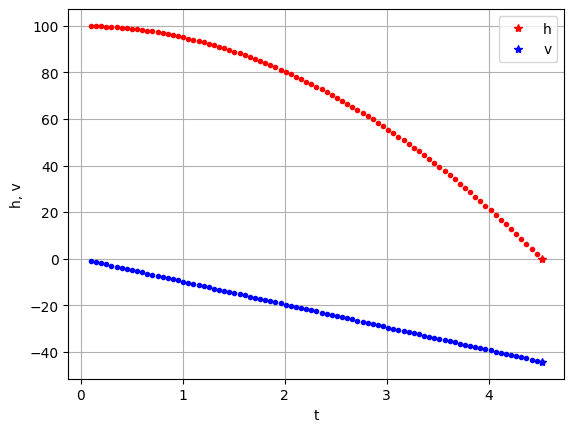

In [55]:

t_all = np.linspace(0.,10.,200)
h0 = torch.FloatTensor([100])
v0 = torch.FloatTensor([0])
g = torch.FloatTensor([-9.8])
x = h0
i = 2
while x>0:
    t = torch.tensor(t_all[i], requires_grad=True)
    x = h0 + v0 * t + g * (t ** 2) / 2
    x.backward()
    # print(t.grad[i])
    plt.plot(t.item(),x.item(),'r.')
    plt.plot(t.item(),t.grad.item(),'b.')
    i += 1
plt.plot(t.item(),x.item(),'r*', label = 'h')
plt.plot(t.item(),t.grad.item(),'b*', label = 'v')
plt.grid()
plt.xlabel('t')
plt.ylabel('h, v')
plt.legend()
plt.show()    

In [52]:
t.grad, x.grad

/tmp/ipykernel_12063/3874992739.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  t.grad, x.grad


(tensor(-44.3216, dtype=torch.float64), None)

/tmp/ipykernel_12063/691923377.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x1, requires_grad=True)


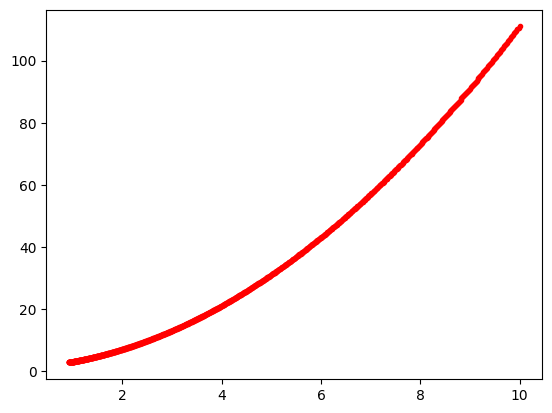

In [58]:
x1 = torch.tensor([10.], requires_grad=True)
i=0
y = torch.tensor([100. **2+100.+1])

while y.abs()>0.1:
    
    # the main variable for calculating dif equation:---------------------
    x = torch.tensor(x1, requires_grad=True)
    y = x + x**2 + 1

    # numerical differential:---------------------------------------------
    y.backward()
    dx = x.grad
    plt.plot(x.item(),y.item(),'r.')
    
    # detach is required to get the instantaneous values:-----------------
    x1 = x.detach().numpy() - 0.001*dx.detach().numpy()
    i += 1
    if i>1000:
        break

#plt.grid()
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
plt.show()

#### 3.2.3 Некоторые хитрости

1) requires_grad

Это атрибут класса Tensor. По умолчанию это False. Это удобно, когда вам нужно заморозить некоторые слои и запретить им обновлять параметры во время тренировки. Вы можете просто установить для параметра requires_grad значение False, и эти тензоры не будут участвовать в графе вычислений.

2) torch.no_grad()

Когда мы вычисляем градиенты, нам нужно кэшировать входные значения и промежуточные функции, поскольку они могут потребоваться для вычисления градиента позже.  Если нам нужно сохранить эти значения для вычисления градиента во время обратного прохода, это повлияет на объем памяти, занимаемой сетью.

С использованием torch.no_grad мы выполняем вывод нашей нейронной сети и мы не вычисляем градиенты и, следовательно, нам не нужно хранить эти значения. Фактически, во время вывода графа вычислений создавать не нужно, так как это приведет к бесполезному потреблению памяти.

PyTorch предлагает для этой цели диспетчер контекста, называемый torch.no_grad.

In [51]:
with torch.no_grad():
    # inference code goes here 
    pass

# 4. Погружаемся в детали

Все основные модули которые будут рассматриваться ниже находятся в [torch.nn](https://pytorch.org/docs/stable/nn.html#). Все кроме оптимизаторов - они находятся в [torch.optim](https://pytorch.org/docs/stable/optim.html)

### 4.1. Слои

#### Линейный слой (Линейное преобразование)

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

$$y = xA^T + b$$

In [59]:
layer = torch.nn.Linear(
    # the size of the input vector
    in_features=3,
    # the number of the out put vector
    out_features=2,
    bias=True
)

In [60]:
layer.weight, layer.bias

(Parameter containing:
 tensor([[-0.0080,  0.0723, -0.2798],
         [-0.0570,  0.5598, -0.0053]], requires_grad=True),
 Parameter containing:
 tensor([-0.4769,  0.4605], requires_grad=True))

### 4.2 Алгоритм обучения в pytorch

In [61]:
import torch
from torch import nn
from torch import optim

1. Для начала нам нужна модель через которую мы будем прогонять данные и получать какой-то результат. Для этого возьмем линейное преобразование:

In [62]:
linear = nn.Linear(2, 2)

У слоя в pytorch мы всегда можем посмотреть веса и отклонение:

In [63]:
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[0.3724, 0.4627],
        [0.4219, 0.2747]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1101,  0.1843], requires_grad=True)


2. Теперь нам нужно определить функцию ошибок для подсчета градиента:

In [64]:
criterion = nn.MSELoss()

3. Так же нам нужен оптимизатор который будет изменять веса нашей модели:

In [65]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

4. Нам нужны данные (х) и верные метки (y) по которым мы поймем правильные ли предсказания делает модель. (В данном случае у нас всего пара значений (данные, метки). О том как организовывать много данных ниже и в дальнейших вебинарах):

In [66]:
x = torch.randn(2, requires_grad=True)
y = torch.randn(2, requires_grad=False)

x, y

(tensor([-2.5583, -0.6671], requires_grad=True), tensor([-0.3036, -0.1520]))

5. Перед тем как считать градиенты и менять веса, нам нужно обнулить градиенты хранящиеся в свойстве тензора .grad. Для этого выполняем следующую строчку кода:

In [67]:
optimizer.zero_grad()

6. Затем делаем предсказание на наших данных х, получаем предсказание модели и сохраняем это предсказание в переменную pred:

In [68]:
pred = linear(x)

7. Переменная pred имеет ту же размерность, что и y. y - это наша правильная метка (ground truth). На этом этапе мы сравниваем предсказанное с реальным и получаем некую численную оценку этого через функцию потерь:

In [69]:
loss = criterion(pred, y)
print('loss: ', loss, ' \nloss_item :', loss.item())

loss:  tensor(0.9992, grad_fn=<MseLossBackward0>)  
loss_item : 0.9991945028305054


Стоит отметить, что если мы посмотрим на переменную .grad наших весов и отклонения, то ничего не будет:

In [70]:
print('dL/dw: ', linear.weight.grad) 
print('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


Это потому что мы не начинали идти в обратном направлении и высчитывать градиенты.

8. Что ж, самое время это сделать. Проходим в обратном направлении и вычислим градиенты:

In [71]:
loss.backward()

Теперь если мы посмотрим на grad весов, то уже что-то увидим:

In [72]:
print('w: ', linear.weight.grad)
print('b: ', linear.bias.grad)

w:  tensor([[2.7318, 0.7123],
        [2.3700, 0.6180]])
b:  tensor([-1.0678, -0.9264])


9. Теперь самое время поменять веса. Для этого надо сделать так называемый шаг оптимизатора. Здесь оптимизатор имея информацию о высчитанных градиентах и значениях весов меняет последние:

In [73]:
# Веса до
print('BEFORE:\n','w: ', linear.weight)
print('b: ', linear.bias, '\n')

# Делаем шаг оптимизатора
optimizer.step()

# Веса после
print('AFTER:\n''w: ', linear.weight)
print('b: ', linear.bias)

BEFORE:
 w:  Parameter containing:
tensor([[0.3724, 0.4627],
        [0.4219, 0.2747]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1101,  0.1843], requires_grad=True) 

AFTER:
w:  Parameter containing:
tensor([[0.3451, 0.4556],
        [0.3982, 0.2686]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0994,  0.1936], requires_grad=True)


#  5. Tensorflow vs PyTorch:

<img src='https://drive.google.com/uc?export=view&id=13SNw7d9JGT8lHMrKN2-mNgYrqKqkNXfG'>

* Определение графа - верно для старых версий, в Октябре 2019 года добавили поддержку подобного стиля программирования 

#### Различия:

PyTorch разработал Facebook Lab в 2016 году, здесь динамическое определение графа. А Tensorflow разрабатывался командой Google Brains в 2015 и до 2019 года граф определялся только статически.

В TensorFlow граф определяется статически перед запуском модели. Связь осуществляется с помощью объекта tf.Session и tf.Placeholder — тензорами, которые во время выполнения программы будут заменены внешними данными.

В PyTorch можно определять, изменять и выполнять узлы как вам угодно без дополнительных session- и placeholder-интерфейсов. Когда вы пишите на TensorFlow, иногда кажется, что с моделью можно связываться через несколько крошечных отверстий в кирпичной стене, за которой и прячется модель.

Существуют архитектуры нейронных сетей, которые получают преимущества от динамического подхода. RNN со статическим графом длина входной последовательности остается постоянной. Это означает, что необходимо зафиксировать длину предложения на максимальном значении, а все более мелкие последовательности заполнять нулями.

Но теперь и в Tensorflow и PyTorch есть возможность динамического определения графа.


[Ссылка](https://chel-center.ru/python-yfc/2020/12/22/pytorch-protiv-tensorflow-dlya-vashego-proekta-glubokogo-obucheniya-python/) на статью где хорошо объясняется различие pytorch от tensorflow.

# 6. Где полученные знания можно применять

pytorch можно использовать в следующих областях:
* Распознавание и синтез аудио. Об этом [torchaudio](https://pytorch.org/audio/stable/index.html)  
* Так же с инструментом pytorch можно заниматься регрессионными проблемами, прогнозирования временных рядов. Например предсказывать цены на определенные валюты, акции, дома и т.д. [ссылка](https://www.machinelearningmastery.ru/lstm-for-time-series-prediction-de8aeb26f2ca/)
* [Задачи NLP](https://pytorchnlp.readthedocs.io/en/latest/index.html#)  
* Можно генерировать разную информацию от картинок до текста и аудио.

В общем pytorch можно применять везде, где используются нейронные сети.

[Бонус](https://www.8host.com/blog/kak-ustanovit-i-ispolzovat-pytorch/): зайдите по ссылке и долистайте до "Экосистема Pytorch"

# Домашнее задание

Ноутбук: [HW1](https://drive.google.com/file/d/1NJT82QddcsH-IjC2lMuUFHXNNi8X5r8a/view?usp=sharing)

# Дополнительные материалы
1. [Pytorch vs Tensorflow in 2020](https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1)
2. [Официальная документация PyTorch](https://pytorch.org/tutorials/)

# Определения


**Вычислительный граф** — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Шаги обучения:
1. Проход по батчу
2. Обнуление градиента
3. Предсказание модели на батче
4. Подсчет ошибки
5. Подсчет градиентов
6. Шаг оптимизации
7. Логирование информации